In [91]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [105]:
#set the random t0 7
numpy.random.seed(7)

In [106]:
#loading the data set
(x_train,y_train), (x_test,y_test) = mnist.load_data()

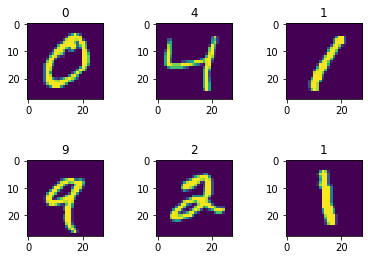

In [107]:
#showing some of data
fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.7)
for i in range (1,7):
    ax = fig.add_subplot(2, 3, i)
    plt.imshow(x_train[i].reshape(28,28))
    plt.title(y_train[i])

In [65]:
#data preprocessing before the model
x_train=x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test=x_test.reshape(x_test.shape[0],28,28,1).astype('float32')
x_train=x_train/255
x_test=x_test/255

In [66]:
#labels preprocessing
y_test=to_categorical(y_test)
y_train=to_categorical(y_train)

In [71]:
#the model
model=Sequential()

#1st convolution layer
model.add(Conv2D(30, (5, 5), input_shape=(28,28,1), activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))
 
#2rd convolution layer
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
#flatten
model.add(Flatten())
#layer 1
model.add(Dense(128,activation='relu')) 
#layer 2
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])


es=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10,min_delta=0.0001)
mc=ModelCheckpoint('best_model2.hdf5',monitor='val_acc',verbose=1,save_best_only=True,mode='max')
          

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               48128     
__________

In [72]:
#fitting the data
history=model.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks=[es,mc], epochs=10, batch_size=200,verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.3942 - acc: 0.8771 - val_loss: 0.0838 - val_acc: 0.9748

Epoch 00001: val_acc improved from -inf to 0.97480, saving model to best_model2.hdf5
Epoch 2/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0945 - acc: 0.9706 - val_loss: 0.0522 - val_acc: 0.9825

Epoch 00002: val_acc improved from 0.97480 to 0.98250, saving model to best_model2.hdf5
Epoch 3/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0675 - acc: 0.9792 - val_loss: 0.0428 - val_acc: 0.9859

Epoch 00003: val_acc improved from 0.98250 to 0.98590, saving model to best_model2.hdf5
Epoch 4/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0578 - acc: 0.9823 - val_loss: 0.0359 - val_acc: 0.9881

Epoch 00004: val_acc improved from 0.98590 to 0.98810, saving model to best_model2.hdf5
E

In [73]:
test_eval = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.02492847358167637
Test accuracy: 0.9924


[5]


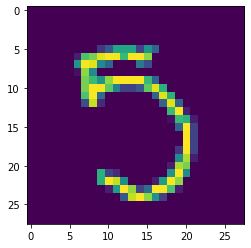

In [101]:
#predicting a sample
model.load_weights('best_model2.hdf5')
img=x_test[2970]
image=img.reshape(1,28,28,1)
classa=model.predict_classes(image)
print(classa)

image=img.reshape(28,28)

plt.imshow(image)
plt.show()